<a href="https://colab.research.google.com/github/RickyMacharm/fastai-v3/blob/master/Swine_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'SwineHealth/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
#path = Path(base_dir + 'data/')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [0]:
path = Path(base_dir + 'data/')

path.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/SwineHealth/data/Healthy'),
 PosixPath('/content/gdrive/My Drive/SwineHealth/data/models'),
 PosixPath('/content/gdrive/My Drive/SwineHealth/data/export.pkl'),
 PosixPath('/content/gdrive/My Drive/SwineHealth/data/Sick'),
 PosixPath('/content/gdrive/My Drive/SwineHealth/data/Outlier')]

In [0]:
classes = ['Sick','Healthy', 'Outlier']

In [0]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Sick


Healthy


Outlier


In [0]:
np.random.seed(13)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Healthy', 'Outlier', 'Sick']

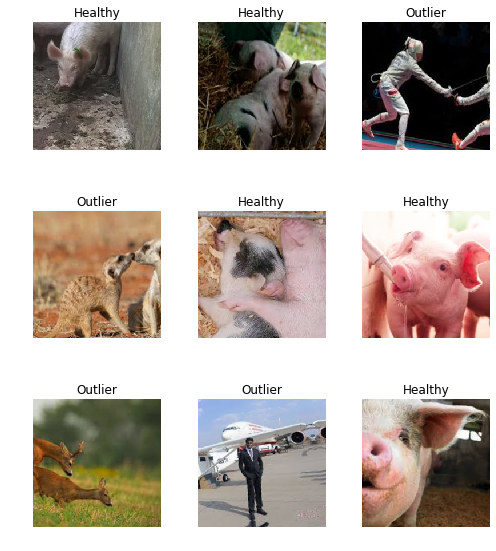

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Healthy', 'Outlier', 'Sick'], 3, 149, 37)

# **Train model**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.537578,1.474701,0.729730,00:02
1,1.277186,1.281090,0.540541,00:03
2,1.029308,1.203167,0.486486,00:03
3,0.853051,0.947533,0.324324,00:03
4,0.723949,0.756383,0.297297,00:03


In [0]:
learn.save('swinehealth-stage-1')

In [0]:
learn.unfreeze()

In [0]:

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


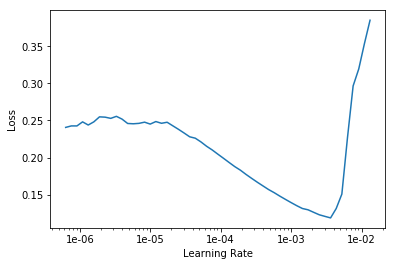

In [0]:

learn.recorder.plot()

In [0]:
learn.fit_one_cycle(7, 3e-025)

epoch,train_loss,valid_loss,error_rate,time
0,0.156782,0.608485,0.270270,00:03
1,0.212015,0.516778,0.243243,00:03
2,0.239439,0.455174,0.162162,00:03
3,0.248974,0.403799,0.135135,00:03
4,0.259151,0.369971,0.135135,00:03
5,0.266850,0.337722,0.108108,00:03
6,0.271968,0.311363,0.081081,00:03


In [0]:
learn.save('swinehealth-stage-2')

## **Interpretation**

In [0]:
learn.load('swinehealth-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (149 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Healthy,Healthy,Healthy,Healthy,Healthy
Path: /content/gdrive/My Drive/SwineHealth/data;

Valid: LabelList (37 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sick,Sick,Sick,Sick,Sick
Path: /content/gdrive/My Drive/SwineHealth/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batch

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

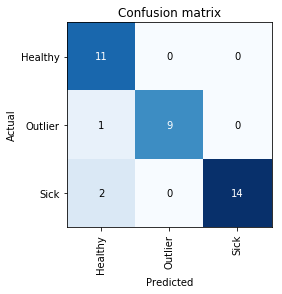

In [0]:

interp.plot_confusion_matrix()

## **Putting your model in production**

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

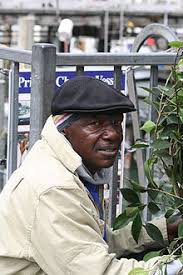

In [0]:
img = open_image(path/'Outlier'/'download (10).jpg')
img 

In [0]:

learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Healthy

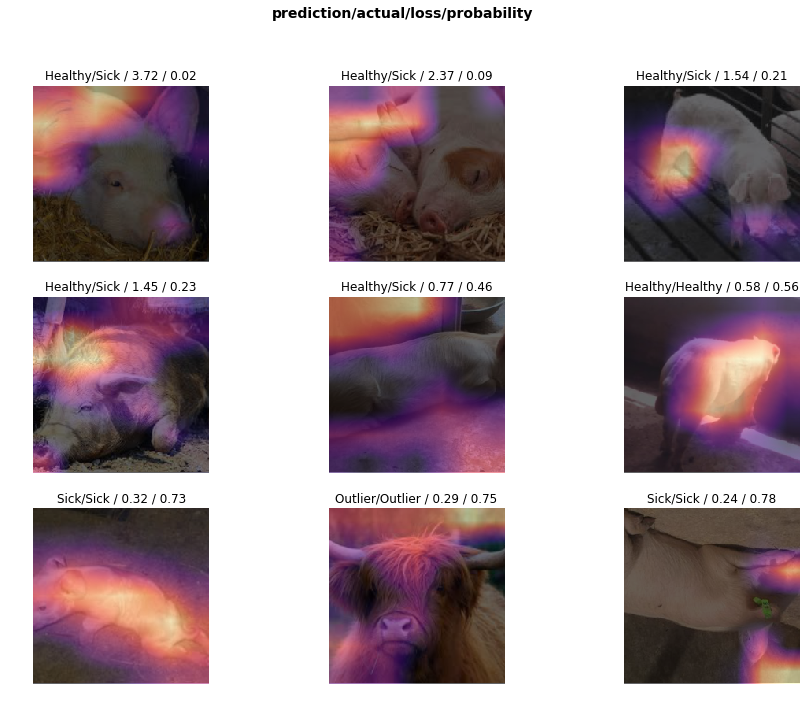

In [0]:
interp.plot_top_losses(9, figsize=(15,11))